<a href="https://colab.research.google.com/github/Harshjyot-Singh-Chawla/-Netflix-Movies-and-TV-shows-Clustering-/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#path to given CSV file 
path ="/content/drive/MyDrive/4th project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [5]:
# creating dataframe using csv file
Net_df = pd.read_csv(path)

In [6]:
#Column names in Dataframe 
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#top 5 
Net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
#tail of data
Net_df.tail(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7757,s7758,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",2006,TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za..."
7758,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...
7759,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...
7761,s7762,Movie,Zapped,Peter DeLuise,"Zendaya, Chanelle Peloso, Spencer Boldman, Emi...","Canada, United States","February 1, 2017",2014,TV-Y,92 min,"Children & Family Movies, Comedies",A girl discovers a dog-training app that can g...
7762,s7763,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
7763,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t..."


In [9]:
#shape of dataframe
Net_df.shape

(7787, 12)

Shape of our dataset is (7787,11) that means we have 7787 number of rows and 11 columns

In [10]:
#Renaming Listed_in column to genre for ease of understanding 
Net_df.rename(columns = {"listed_in":"genres"},inplace = True)
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [11]:
#basic info
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [12]:
# Descriptive Statistical Summary of Numeric Variables

Net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [13]:
#checking unique values of each features
Net_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

In [14]:
#checking for duplicated value
Net_df.duplicated().sum()

0

In [15]:
# Droping (show_id) column as it has no use in our Analysis
Net_df = Net_df.drop(['show_id'], axis =1)

In [16]:
#to check dataframe after dropping show_id column
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   genres        7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


# **Handling Null Values**

In [17]:
#To check total no of null values in each column
Net_df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

There are quite alot of null values in the dataset. There are a total of 3,631 null values across the entire dataset,which is half the number of total dataset column. we cant just drop the columns containing null values.


In [18]:
# Null value hadling
Net_df['director'].fillna('Unknown', inplace=True)
Net_df['cast'].fillna('Unknown', inplace=True)
Net_df['country'].fillna('Unknown', inplace=True)
Net_df.dropna(subset=['date_added','rating'],inplace=True)

since the null values for data_added and rating is only 10 and 7 rspectively, we drop this rows from our original dataset. 

In [19]:
Net_df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

Now that we have dealt with all the null values.

In [20]:
#Extracting two features from date_added column
import datetime as dt
Net_df["date_added"] = pd.to_datetime(Net_df['date_added'])

# Year_added
Net_df['year_added'] = Net_df['date_added'].dt.year

#Adding month column from 'date_added'
Net_df['month_added']=Net_df['date_added'].dt.month


# Droping the month_added columns
Net_df.drop(['date_added'],axis=1,inplace=True)

In [21]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   release_year  7770 non-null   int64 
 6   rating        7770 non-null   object
 7   duration      7770 non-null   object
 8   genres        7770 non-null   object
 9   description   7770 non-null   object
 10  year_added    7770 non-null   int64 
 11  month_added   7770 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 789.1+ KB


# **EDA**

# **TYPE**

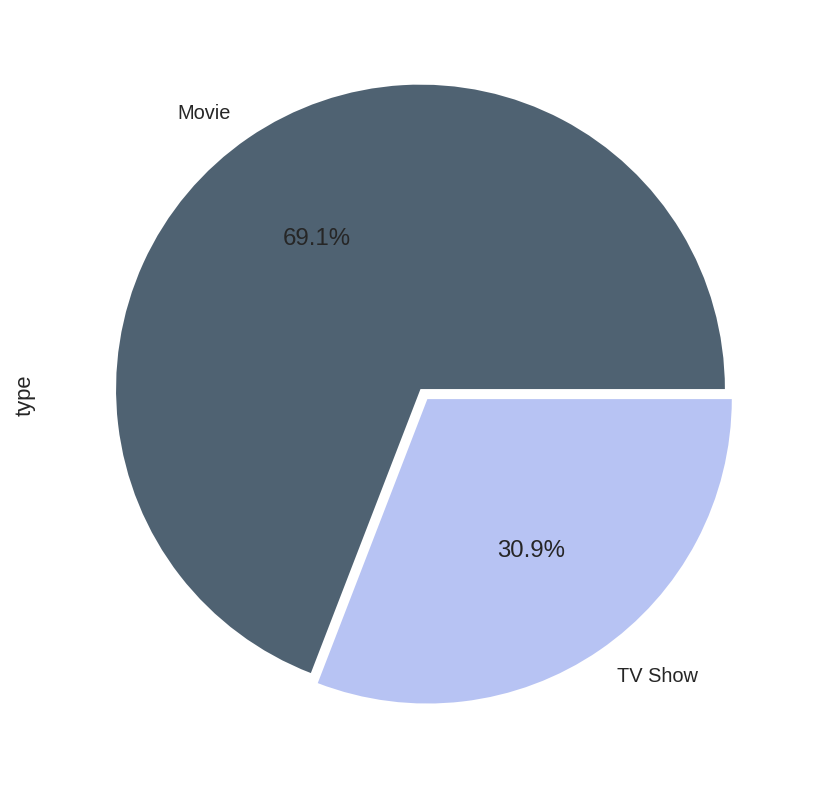

In [22]:
## checking count of content type present in data
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Net_df['type'].value_counts().plot.pie( autopct = '%.1f%%',explode = [0.02,0.02],colors = colors, figsize=(15,7))

### **There are more number of Movies than TV shows on Netflix.The percentages are 69.1% for Movies and 30.9% for TV shows.**

# **Title**

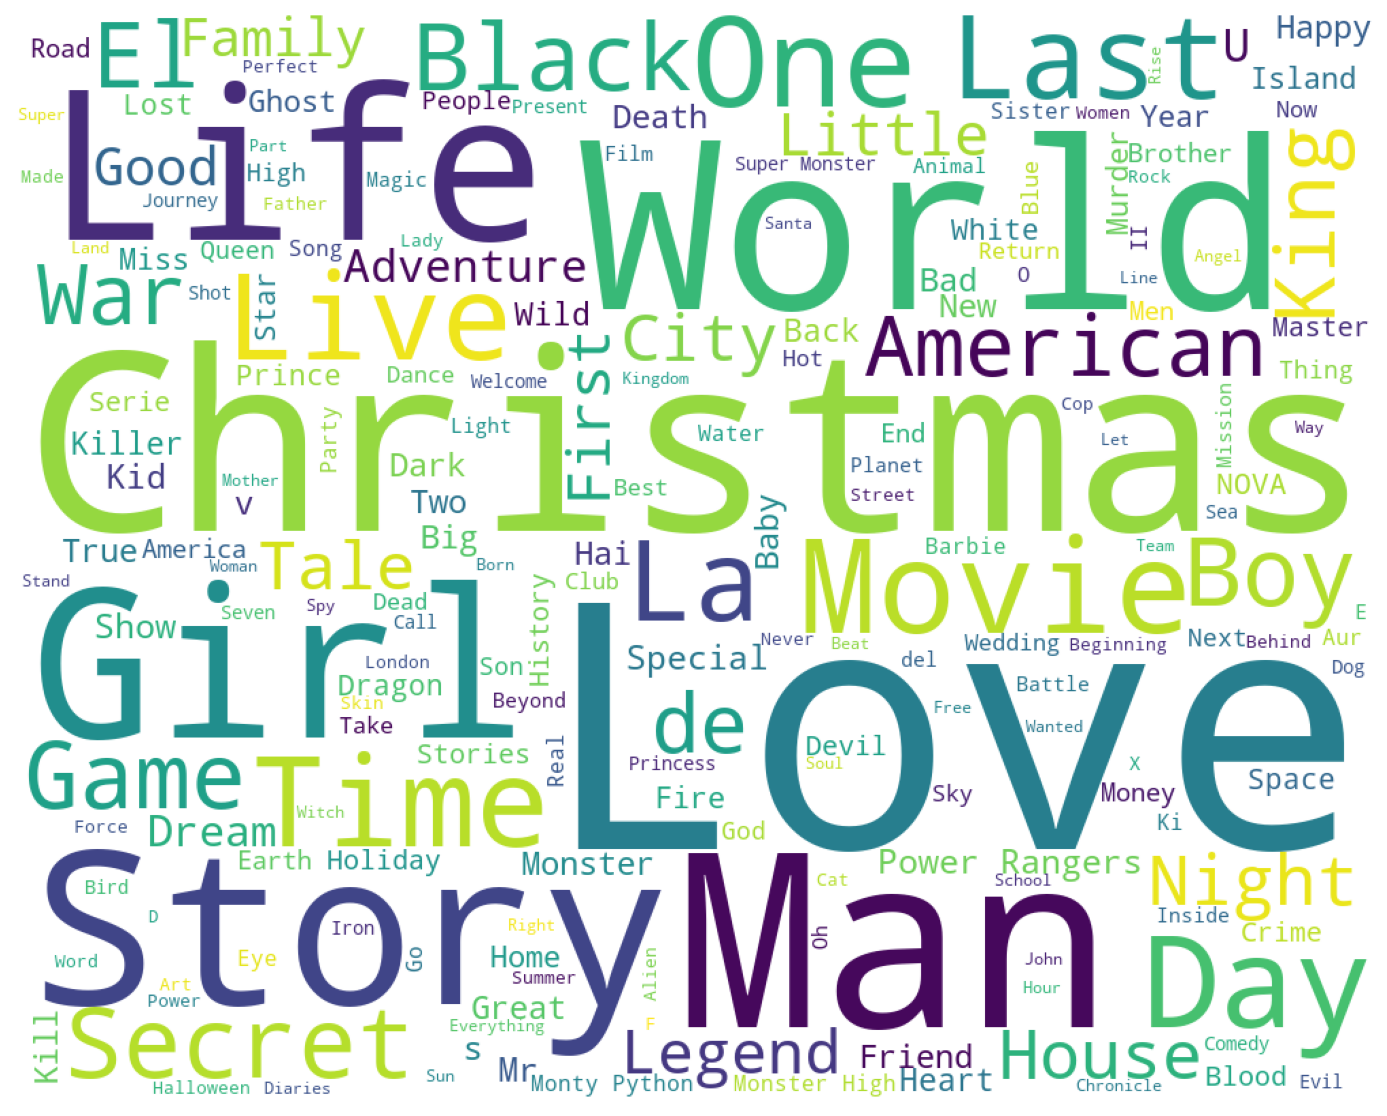

In [23]:
#Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

#Most occurred word in title
plt.subplots(figsize=(20,10))
stopwords = set(STOPWORDS)
text = " ".join(Net_df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### ** "chirstmas", "love", "world", "man" and "life" are few of the words which are used frequenctly in title of movies and Tv shows.**

# **DIRECTOR**

In [24]:
Net_df["director"].nunique()

4048

In [25]:
Net_df["director"].value_counts()

Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Charles Officer              1
John Trengove                1
Jonathan Helpert             1
Jacob Schwab                 1
Sam Dunn                     1
Name: director, Length: 4048, dtype: int64

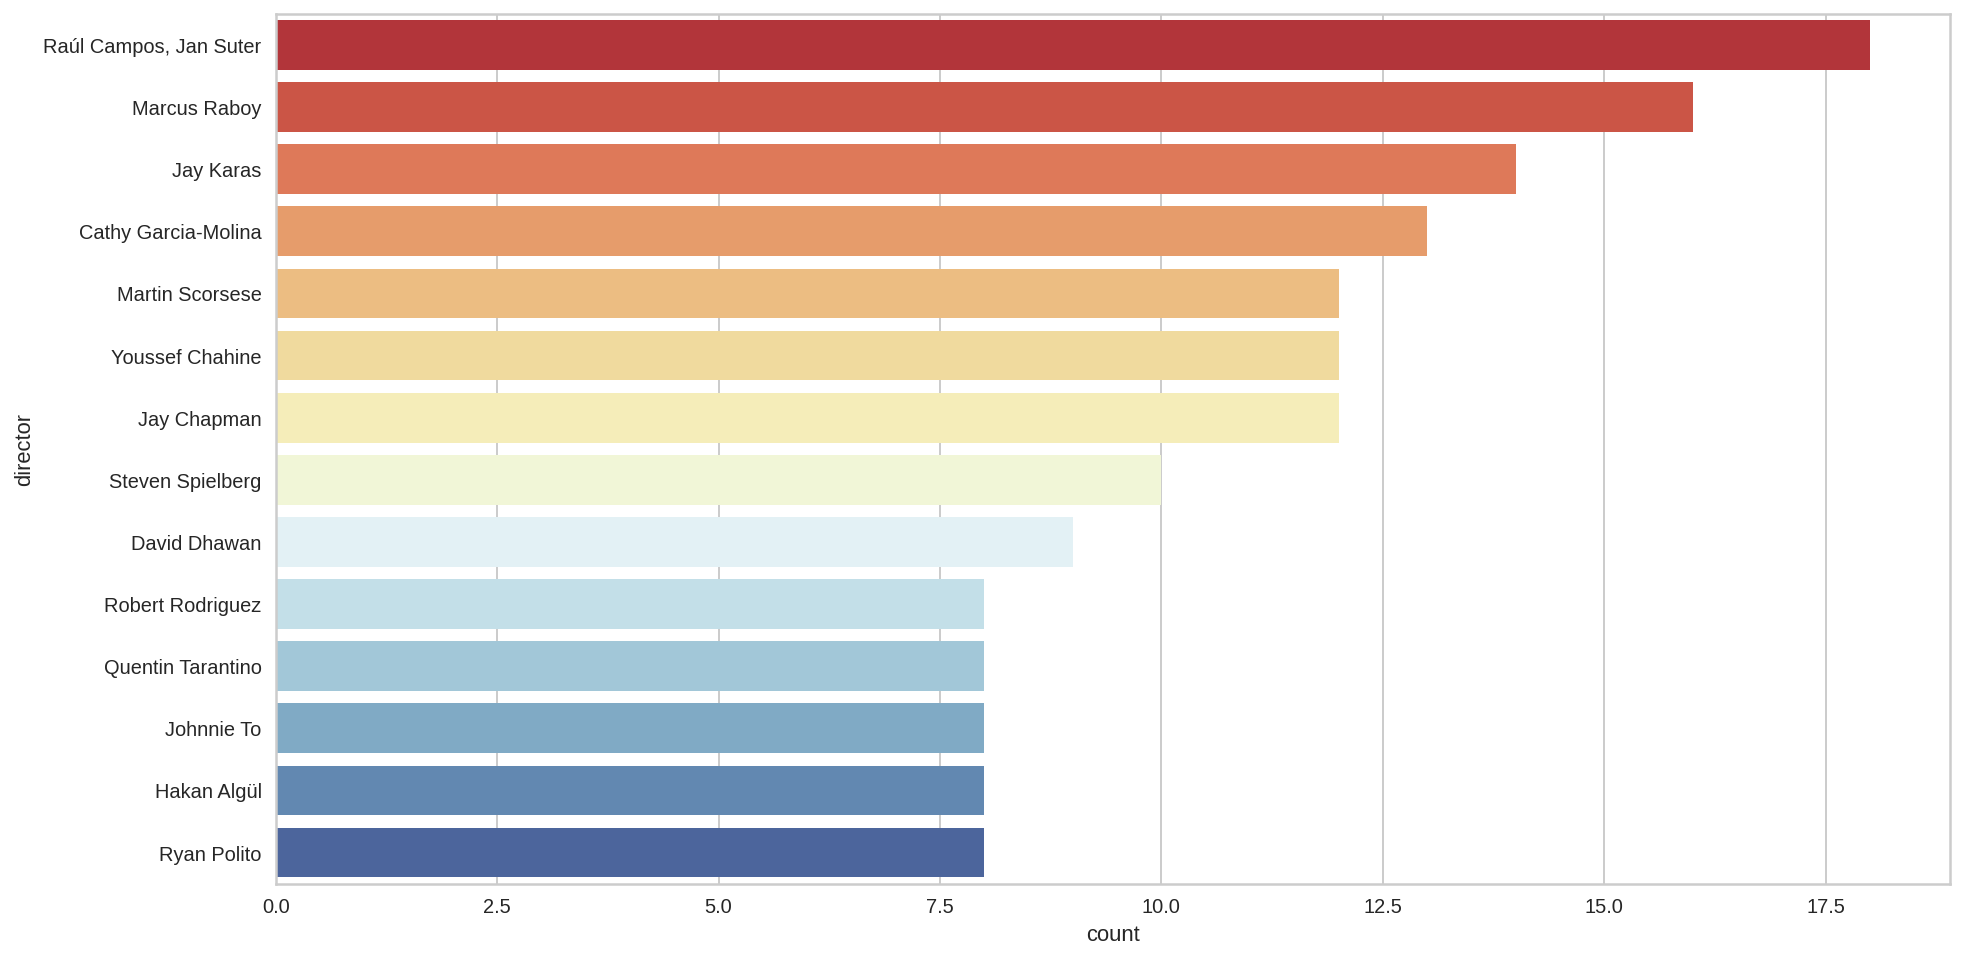

In [26]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['director'], data = Net_df , palette="RdYlBu", order=Net_df['director'].value_counts().index[1:15] )

Raul Campos and Jan Sulter collectively have the most content on Netflix.

# **COUNTRY**

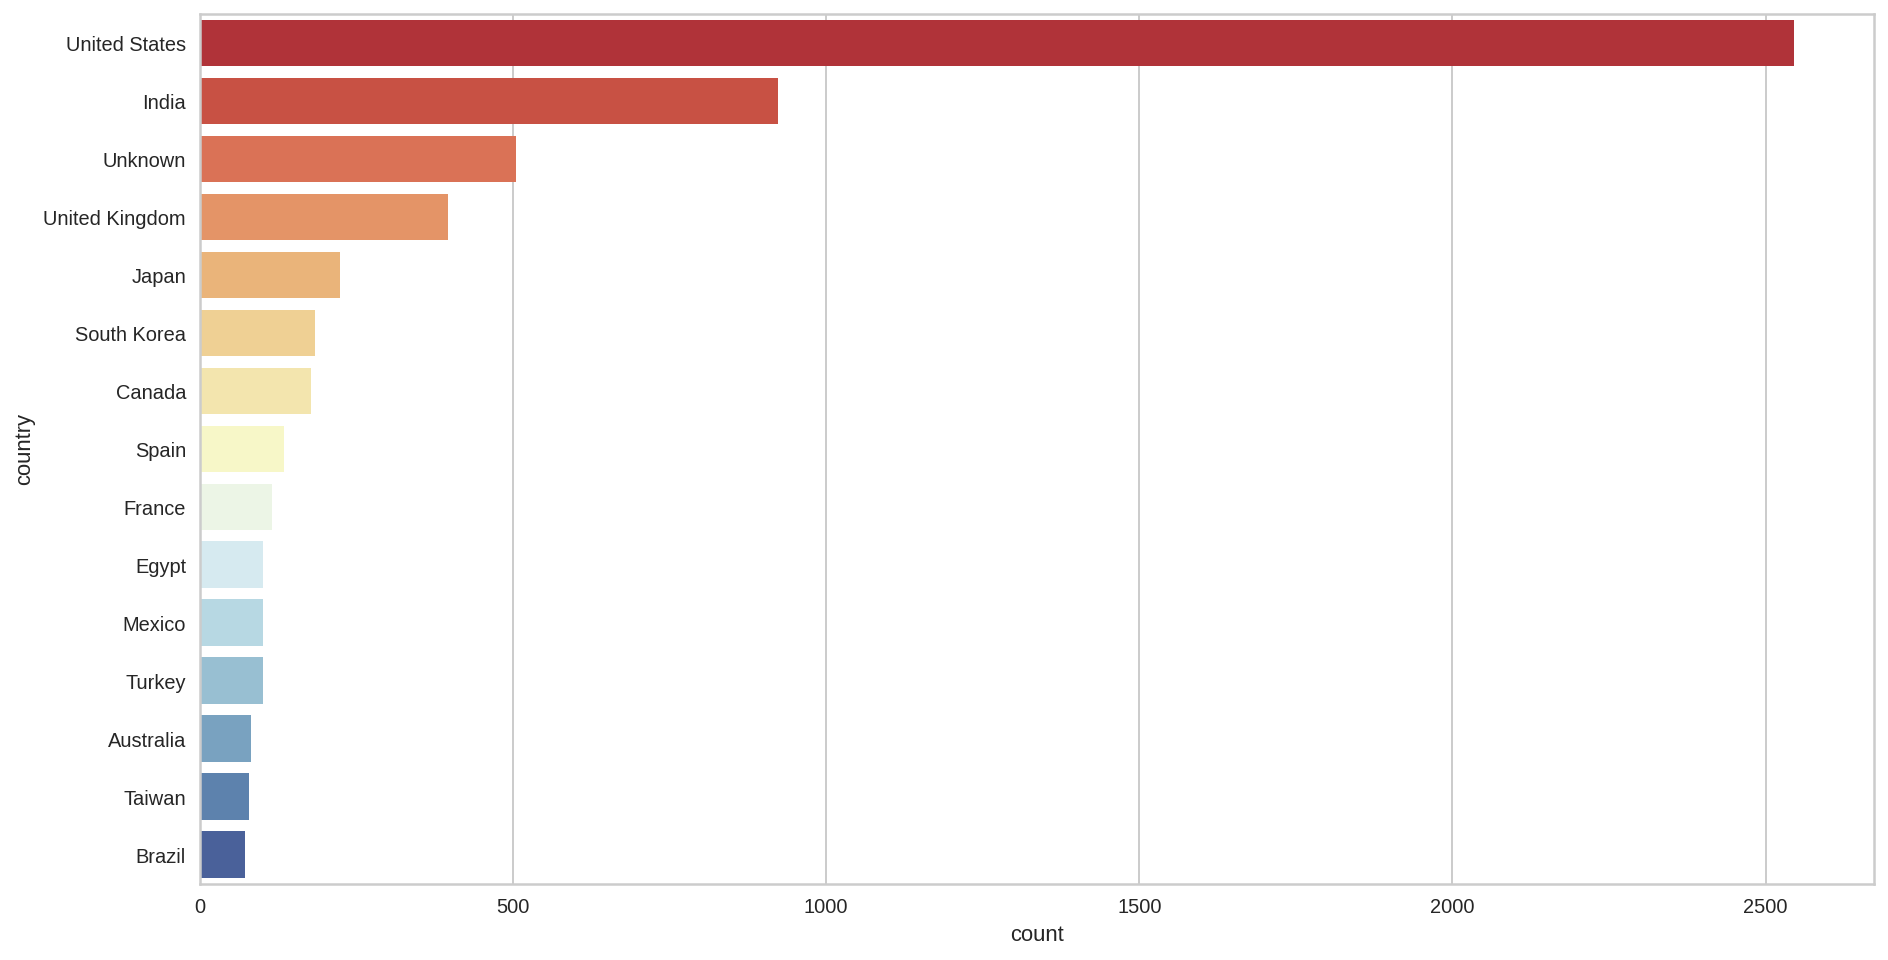

In [27]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['country'], data = Net_df , palette="RdYlBu", order=Net_df['country'].value_counts().index[0:15] )

The United States has the most number of content on Netflix by a huge margin followed by India.

# **RATING**

In [28]:
Net_df["rating"].nunique()

14

In [29]:
Net_df["rating"].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [30]:
rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

Net_df['rating'] = Net_df['rating'].replace(to_replace = rename_rating)
Net_df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

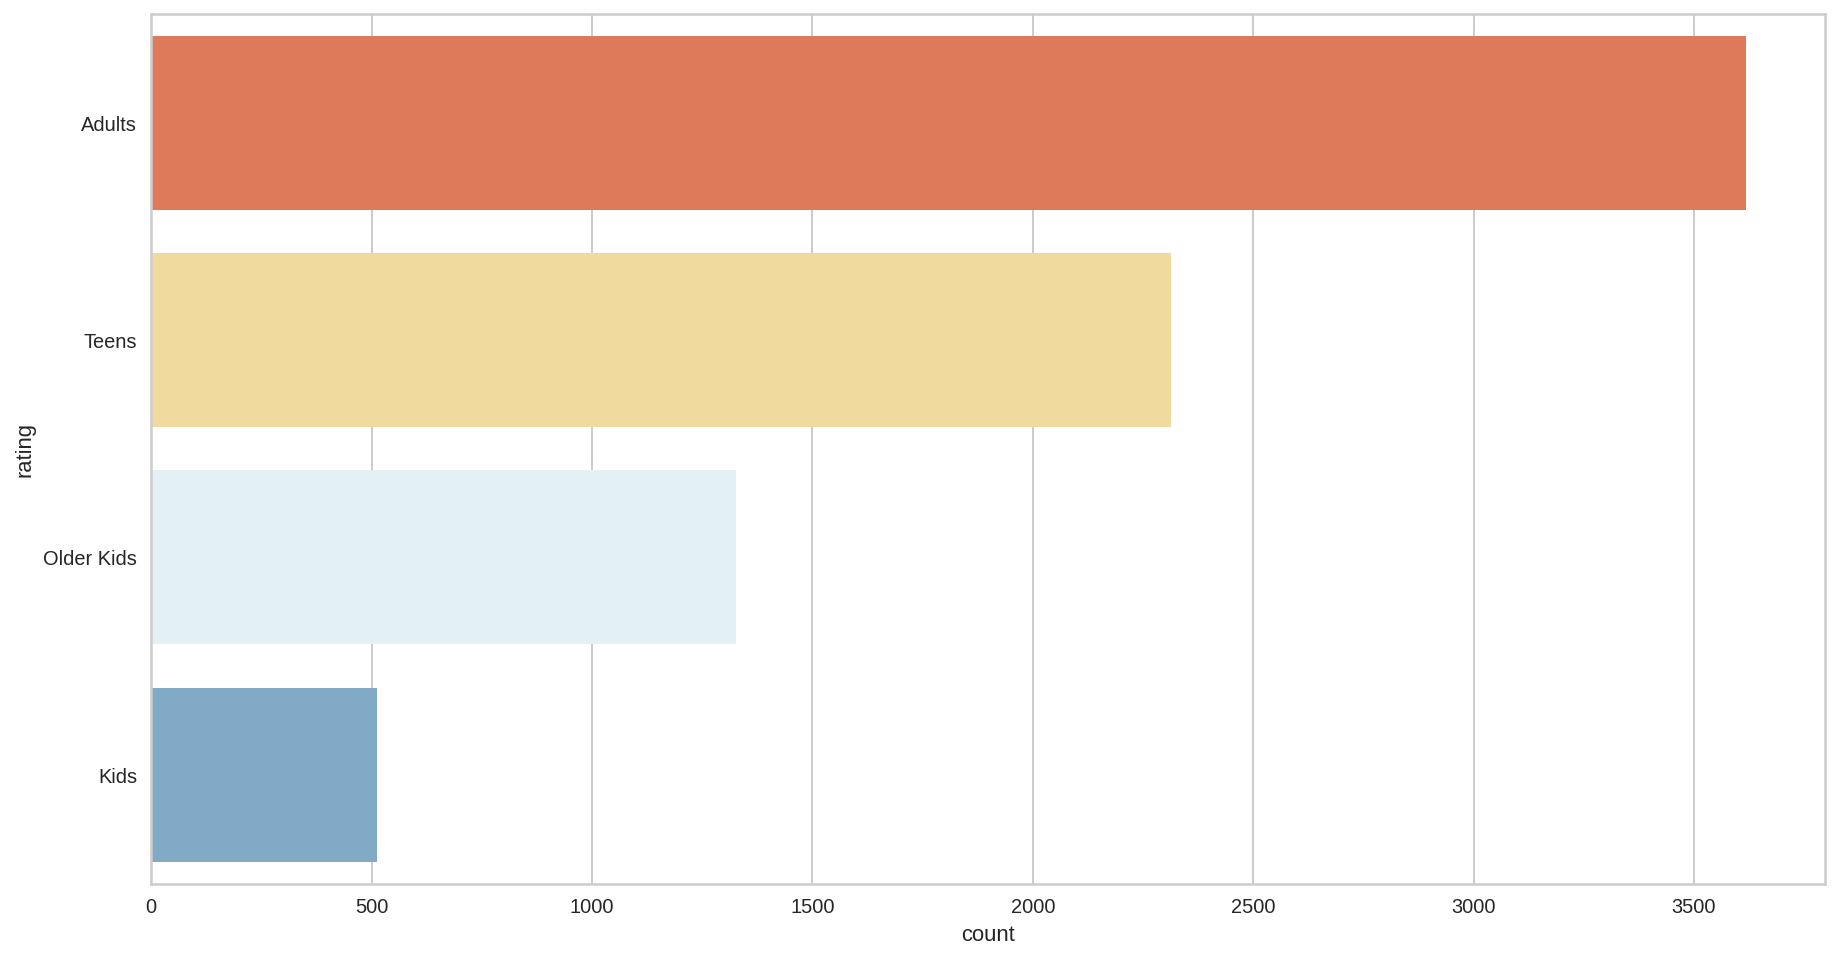

In [31]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['rating'], data = Net_df , palette="RdYlBu", )

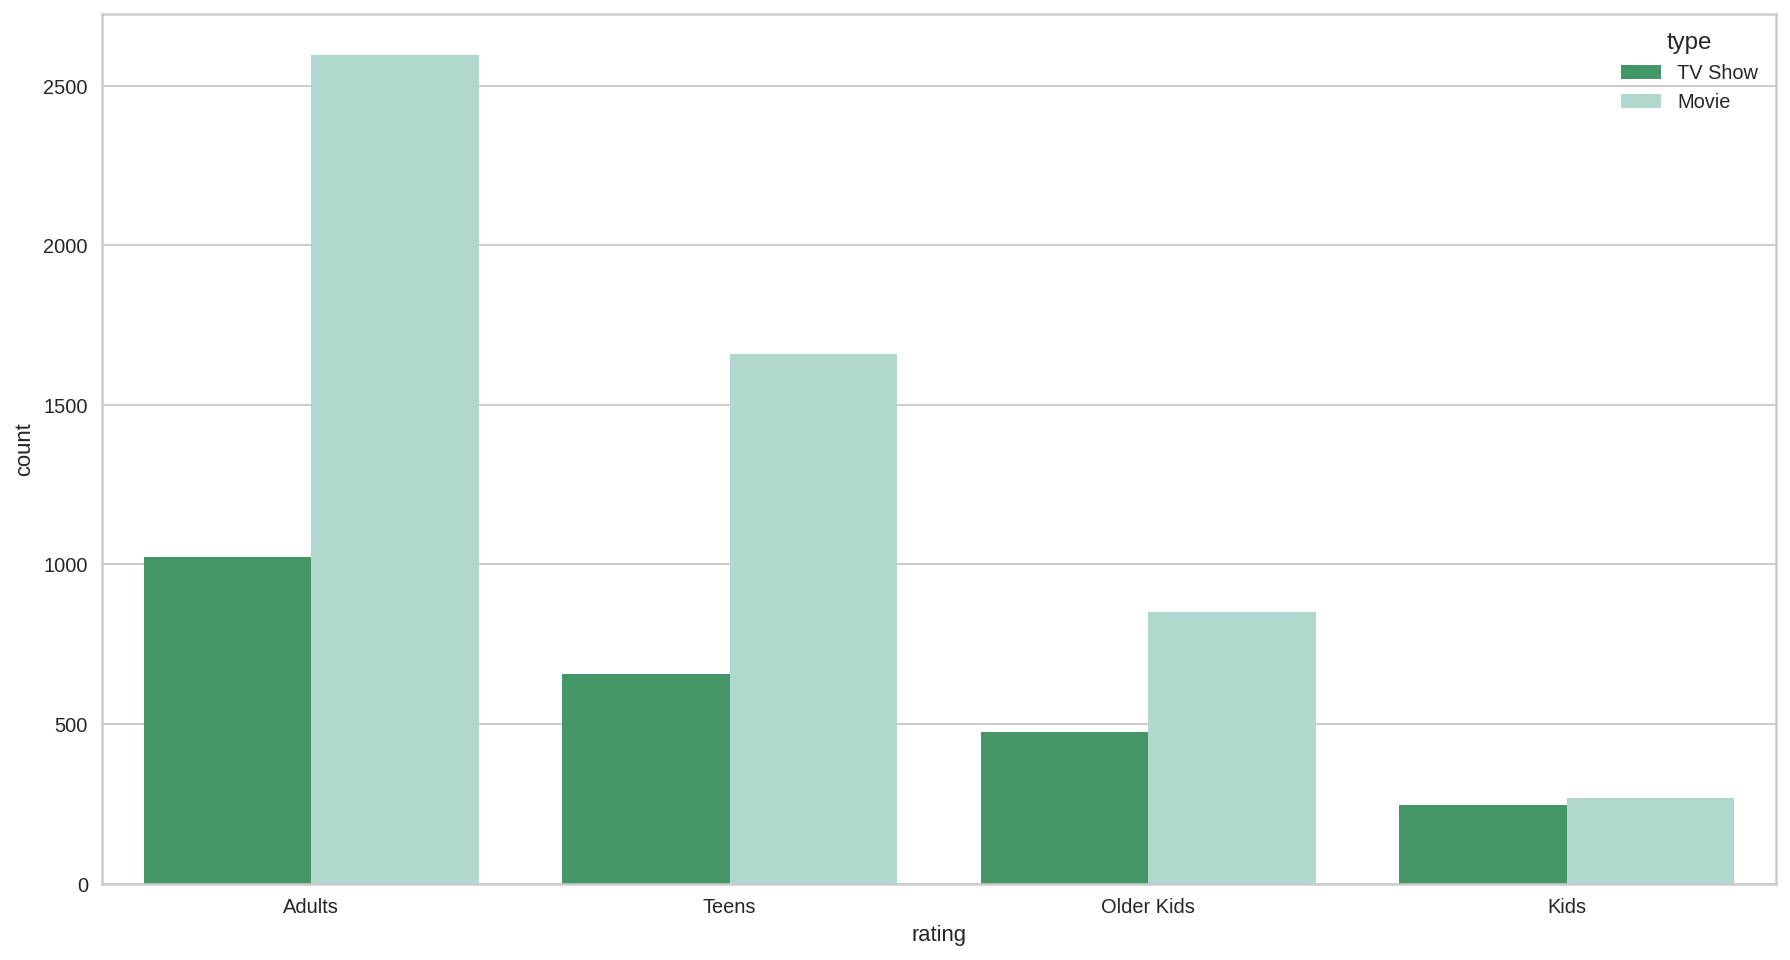

In [32]:
#ploting countplot 
plt.figure(figsize=(15,8))
ax = sns.countplot(data = Net_df , x = Net_df['rating'],palette = 'BuGn_r', hue = Net_df['type'],)

Most of the content made are for adult followed by teens.

# **year_added**

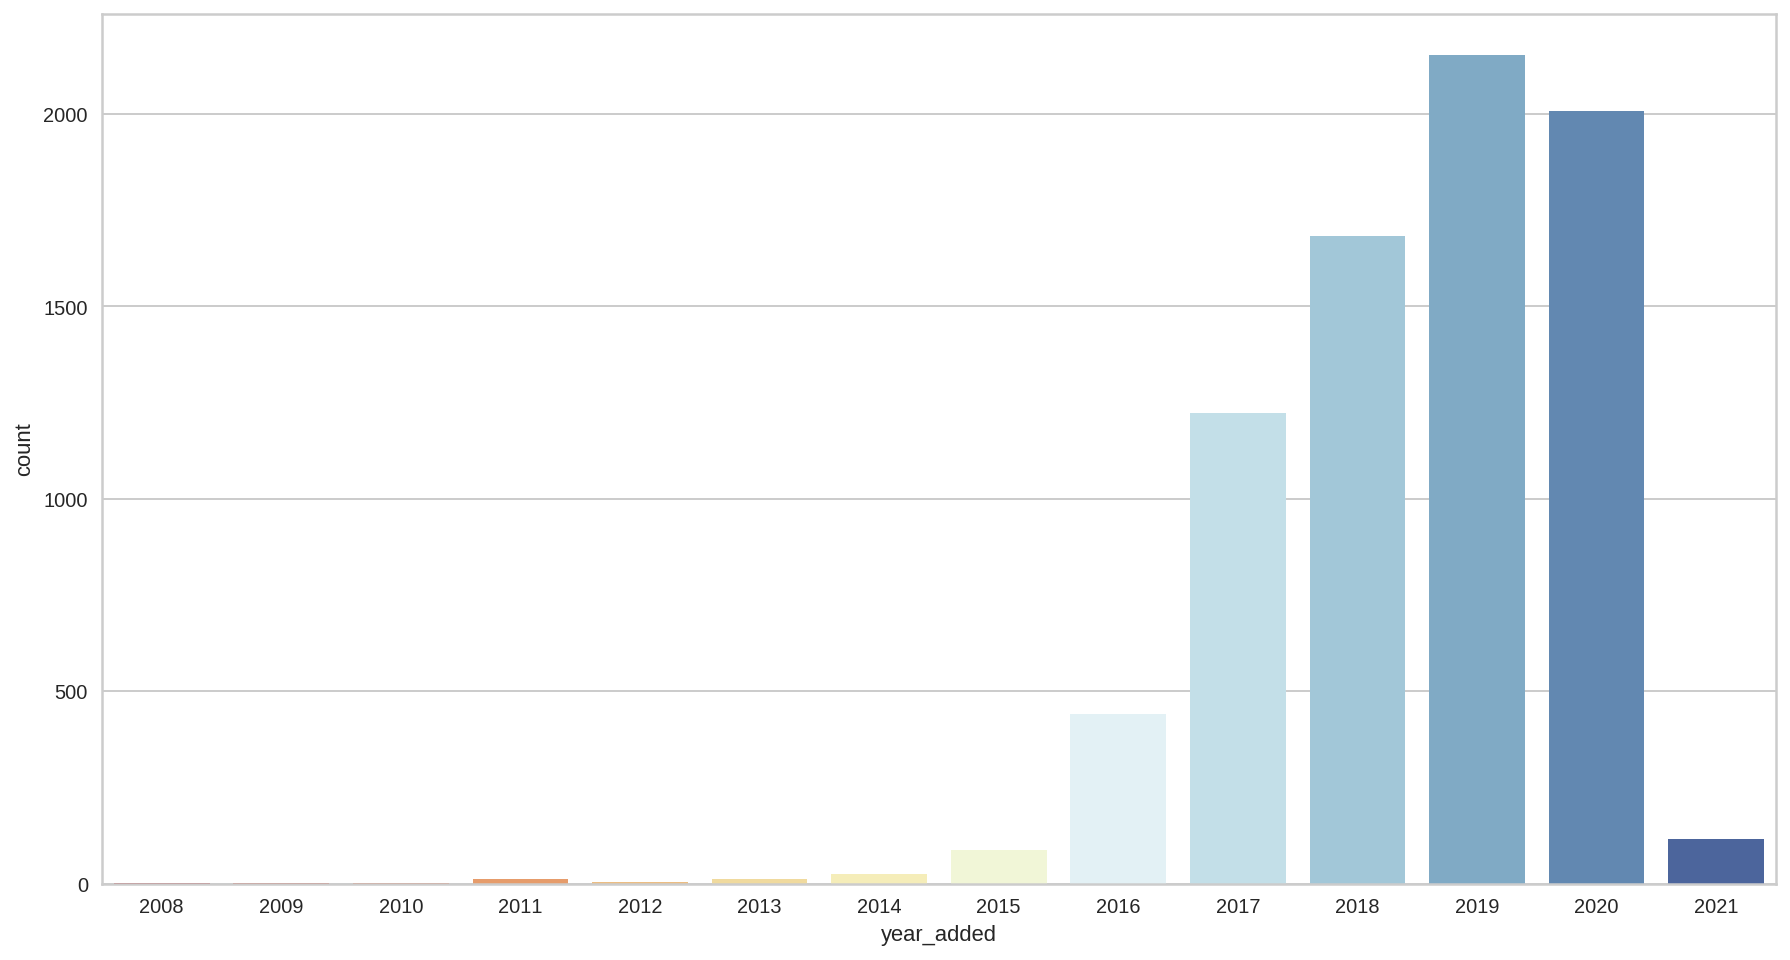

In [33]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(x =Net_df['year_added'], data = Net_df , palette="RdYlBu", )

The number of release have significantly increased after 2015 and have dropped in 2021 because of Covid 19

# **month_added**

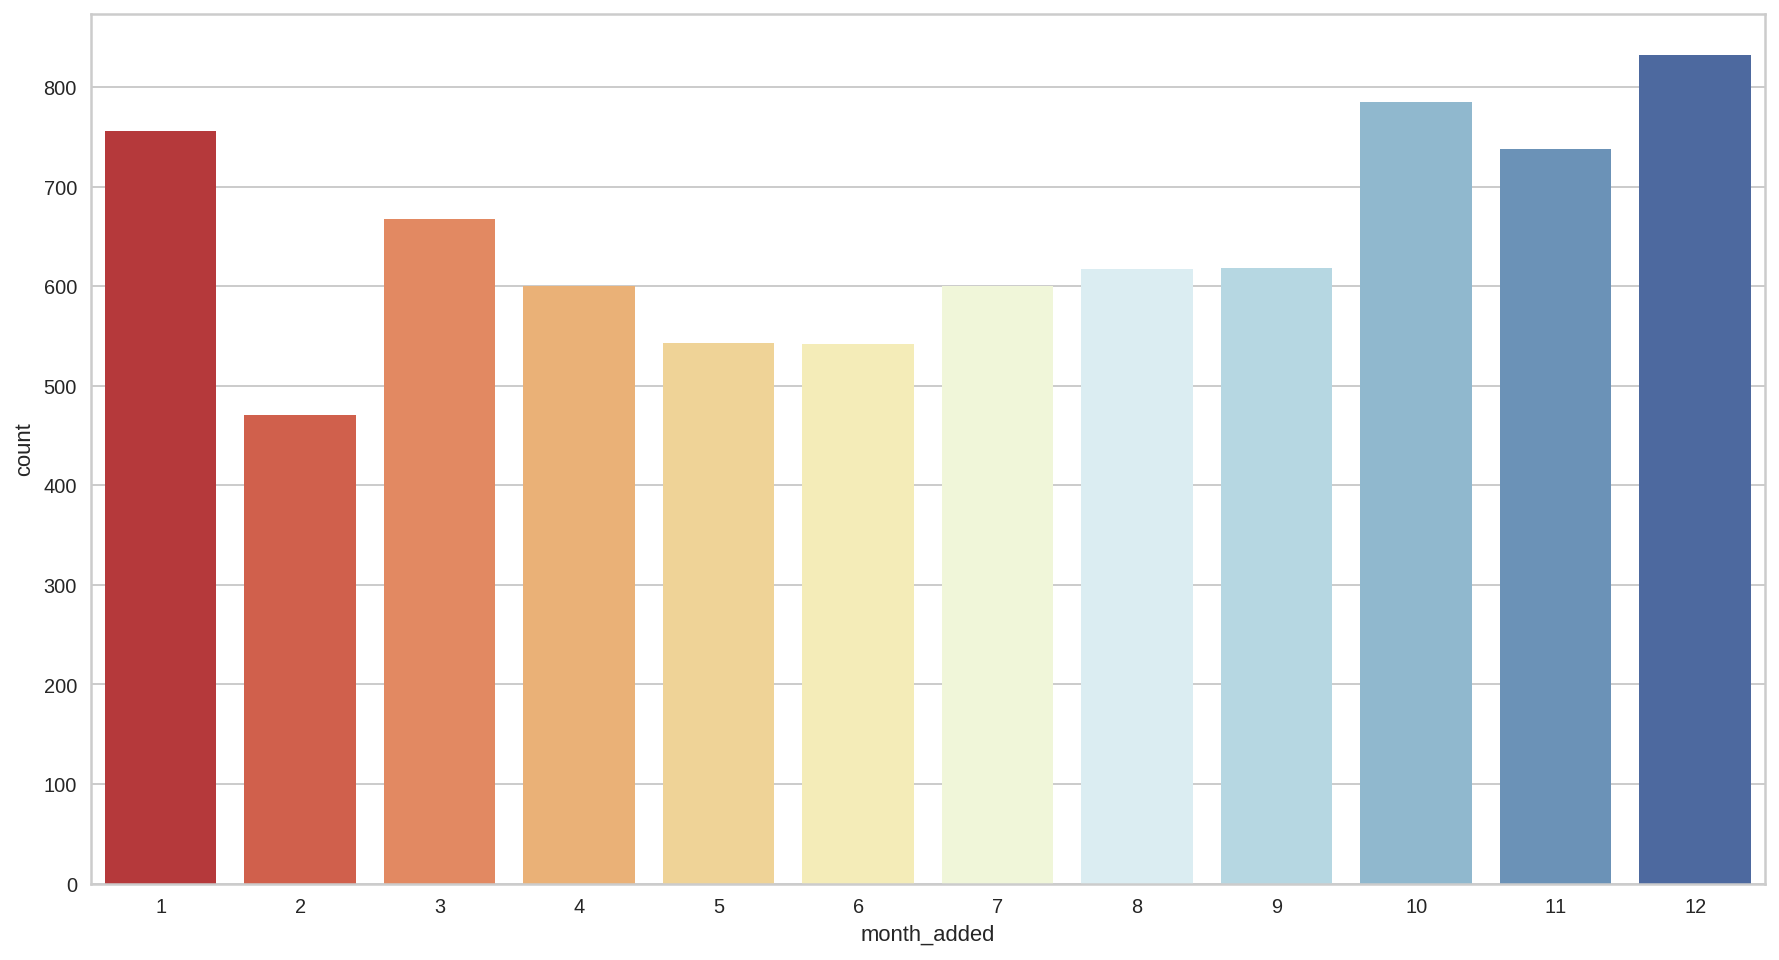

In [34]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(x =Net_df['month_added'], data = Net_df , palette="RdYlBu", )


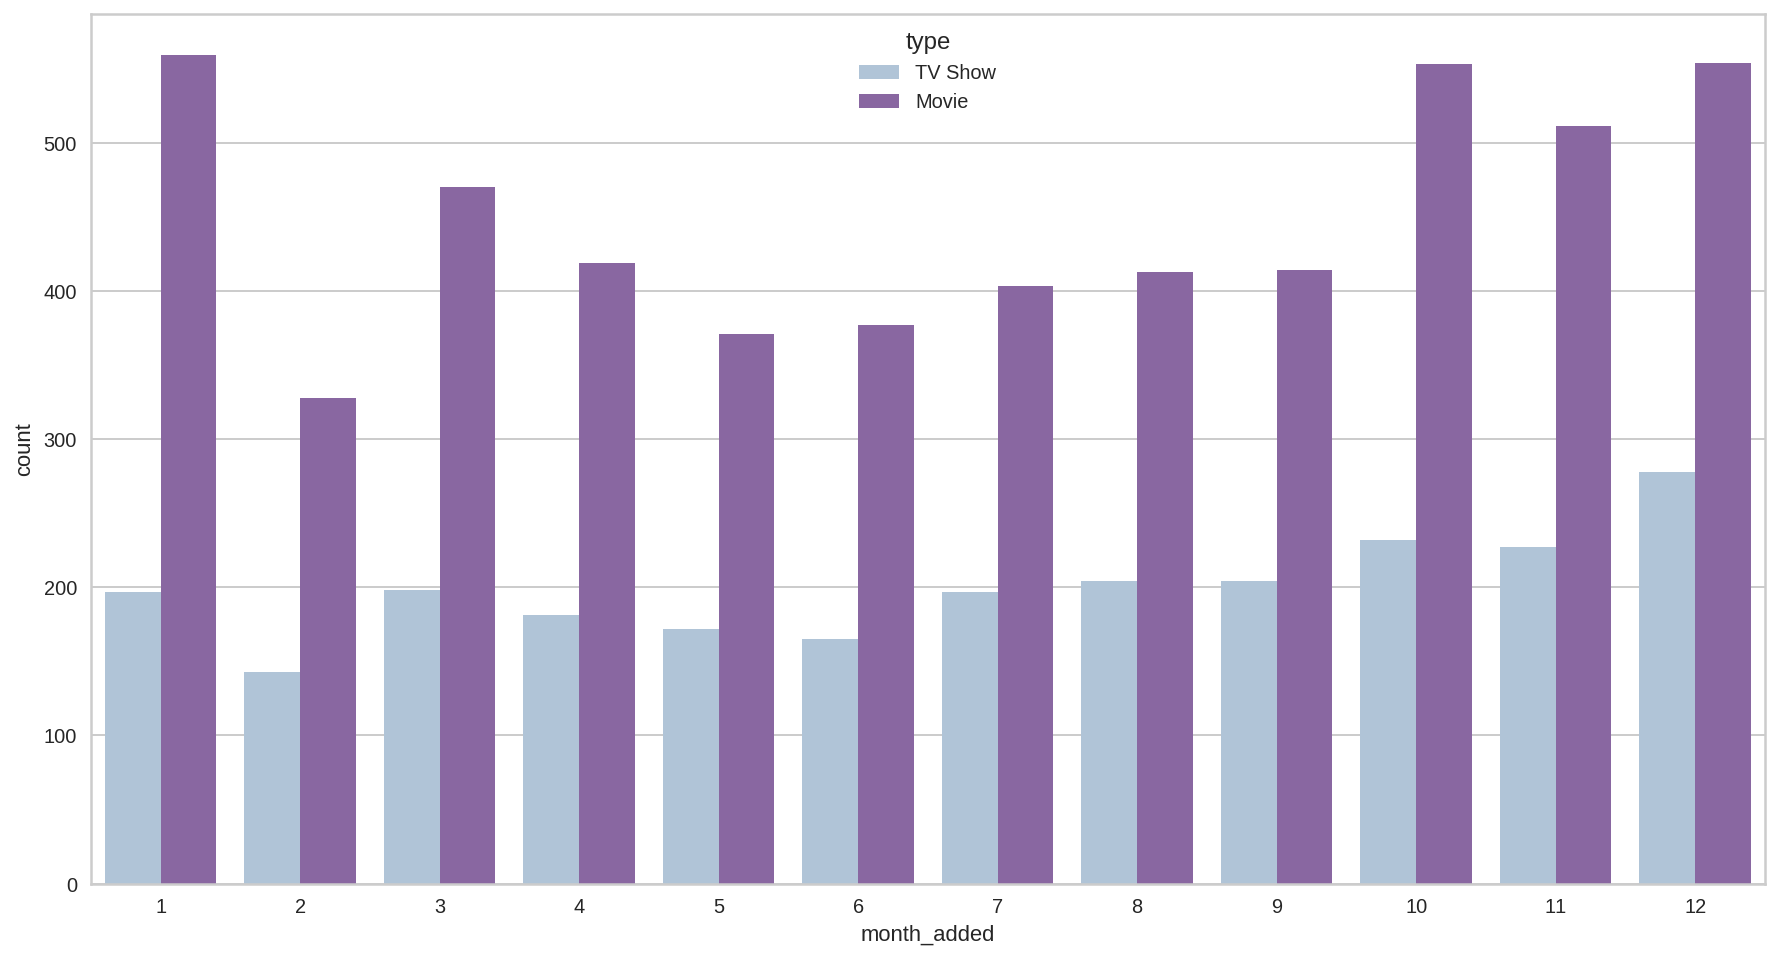

In [35]:
#ploting countplot 
plt.figure(figsize=(15,8))
sns.countplot(x=Net_df['month_added'],palette="BuPu",hue=Net_df['type'])

More of the content is released in holiday season - October, November, December and January